In [1]:
from SALib import ProblemSpec
from SALib.test_functions import Ishigami
import numpy as np

import matplotlib.pyplot as plt

### Notes
`sp`: ProblemSpec object

`sp.sample_[name of method]` \
`sp.sample(my_sampler, *args, **kwargs)` \
`sp.analyze_[name of method]`

### To evalute models: 
https://salib.readthedocs.io/en/latest/user_guide/basics_with_interface.html#running-a-model 

`sp.evaluate(my_model)`\
`my_model` should accept numpy array as input in first position

OR 

```
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = evaluate_model(X)

# Provide the results to the interface
sp.set_results(Y)
```

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	8192 samples
Outputs:
	1 outputs: ['Y']
	8192 evaluations
Analysis:
          ST   ST_conf
x1  0.561789  0.087312
x2  0.445972  0.042600
x3  0.245203  0.026877
          S1   S1_conf
x1  0.314775  0.061217
x2  0.440535  0.054181
x3  0.006142  0.053794
                S2   S2_conf
(x1, x2)  0.013057  0.097432
(x1, x3)  0.246372  0.119372
(x2, x3)  0.007009  0.064755



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

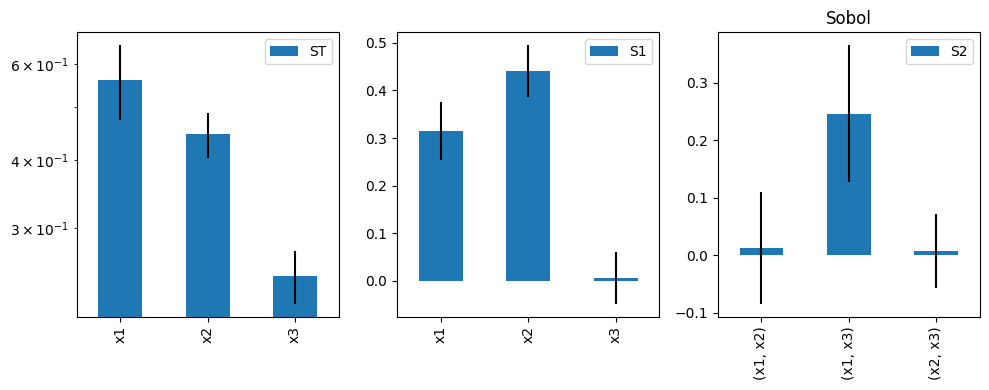

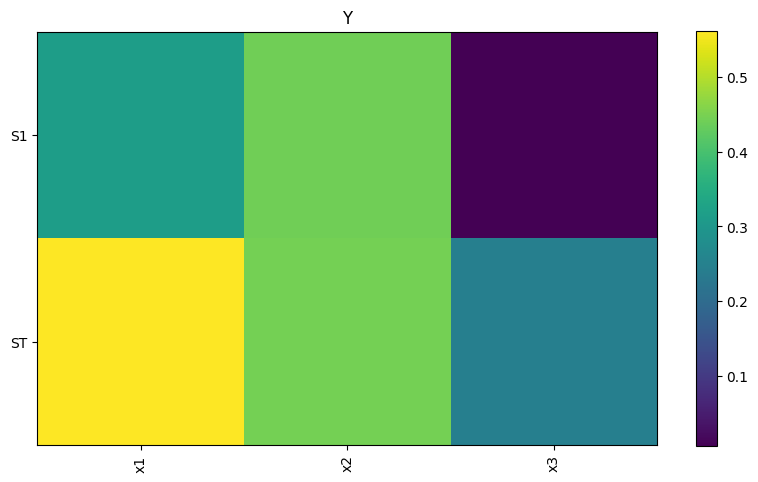

In [4]:
# ==== Sobol Indices ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# generate sample, evaluate mode, find sobol indices 
(sp.sample_sobol(1024).evaluate(Ishigami.evaluate).analyze_sobol())

# information from .analyze stored in sp, data handled as numpy array
X = sp.samples
y = sp.results
S = sp.analysis

print(sp)

total_Si, first_Si, second_Si = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes[0].set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Sobol")
plt.tight_layout()

sp.heatmap()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x1  7.704054  7.704054  6.251923  3.133915e-01
x2 -0.173250  7.875000  7.877034  3.711393e-15
x3 -0.087483  5.936356  8.617236  3.773758e-01



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

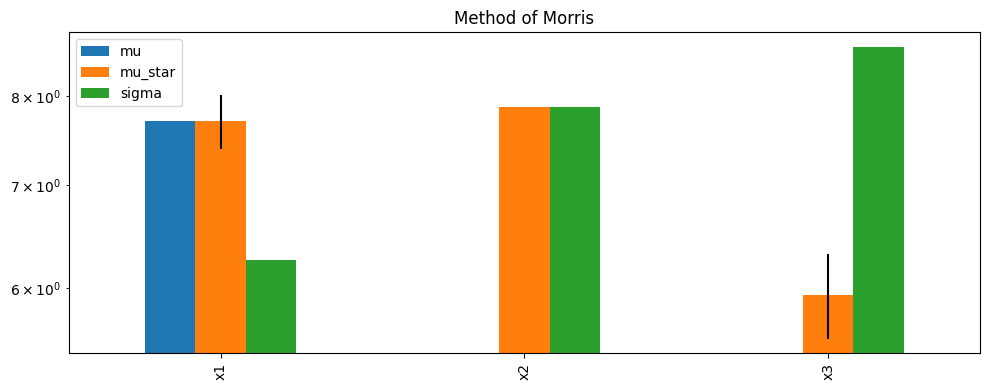

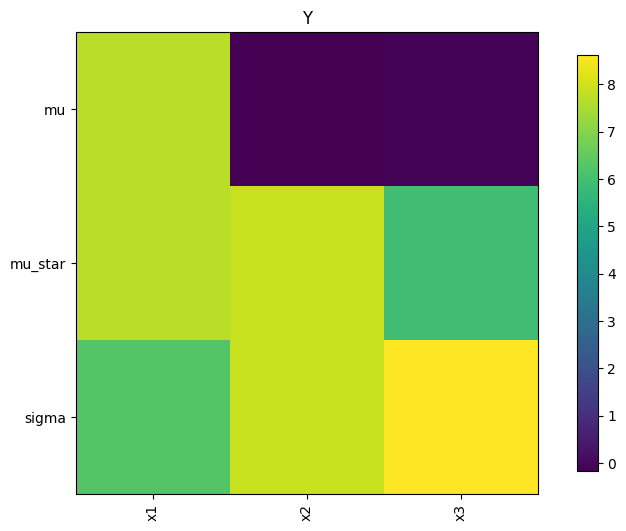

In [5]:
# ==== Method of Morris ~ Ishigami ===
# from SALib.analyze import morris

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO there's lots of options for sampling 
# SALib.sample.morris.morris module https://salib.readthedocs.io/en/latest/api/SALib.sample.morris.html#module-SALib.sample.morris.morris
# https://salib.readthedocs.io/en/latest/api/SALib.analyze.html#module-SALib.analyze.morris (example code that didn't work)

(sp.sample_morris(1000).evaluate(Ishigami.evaluate).analyze_morris())
print(sp)

df_morris = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Method of Morris")
plt.tight_layout()

sp.heatmap()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


{'S1': [0.33293038415124143, 0.42103776929363423, 0.0018288239274640815], 'S1_conf': [0.06078642535637886, 0.07189330048372895, 0.04447345161615013], 'names': ['x1', 'x2', 'x3']}


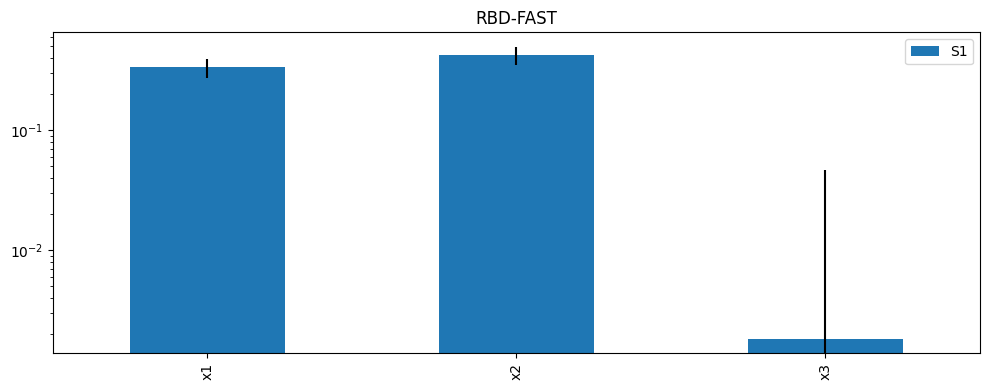

In [7]:
# ==== RBD-FAST ~ Ishigami ===
from SALib.sample import latin
from SALib.analyze import rbd_fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

X = latin.sample(sp, 1000)
Y = Ishigami.evaluate(X)
sp = rbd_fast.analyze(sp, X, Y, print_to_console=False)
print(sp)

df_rbd_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="RBD-FAST")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
          S1   S1_conf
x1  0.321846  0.063594
x2  0.425556  0.070506
x3  0.001855  0.038214



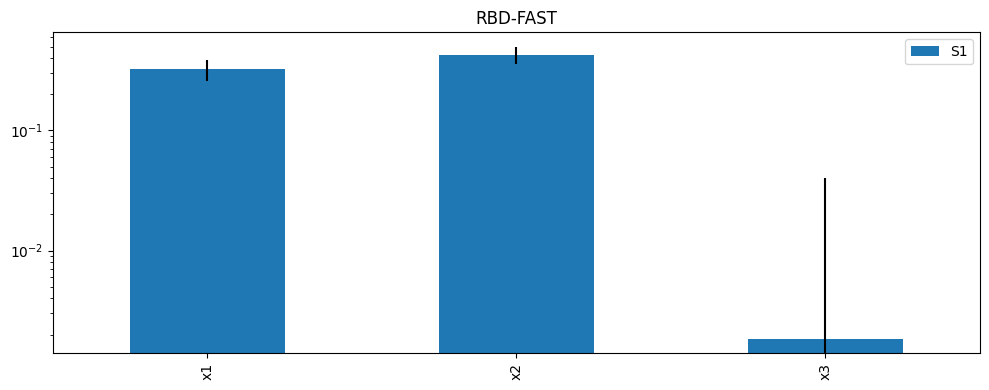

In [8]:
# ==== RBD-FAST ~ Ishigami ===
# from SALib.sample import latin
# from SALib.analyze import rbd_fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ??? any sample 
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_rbd_fast())
print(sp)

df_rbd_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="RBD-FAST")
plt.tight_layout()

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	3000 samples
Outputs:
	1 outputs: ['Y']
	3000 evaluations
Analysis:
              S1        ST   S1_conf   ST_conf
x1  2.943341e-01  0.527198  0.015225  0.043367
x2  4.421347e-01  0.469253  0.013250  0.037007
x3  4.102932e-29  0.239203  0.014914  0.038135



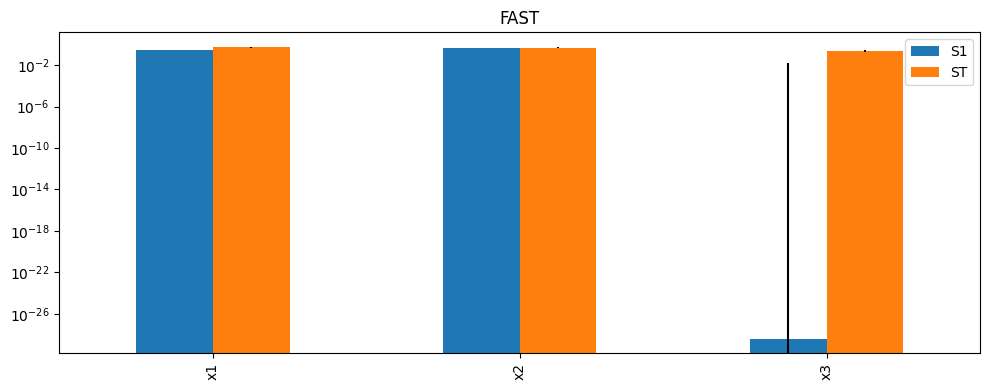

In [81]:
# ==== FAST ~ Ishigami ===
# from SALib.analyze import fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_fast(1000).evaluate(Ishigami.evaluate).analyze_fast())
print(sp)

df_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="FAST")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
       delta  delta_conf        S1   S1_conf
x1  0.202518    0.022496  0.282158  0.041974
x2  0.271749    0.021447  0.256966  0.047473
x3  0.188957    0.022951  0.011026  0.009429



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

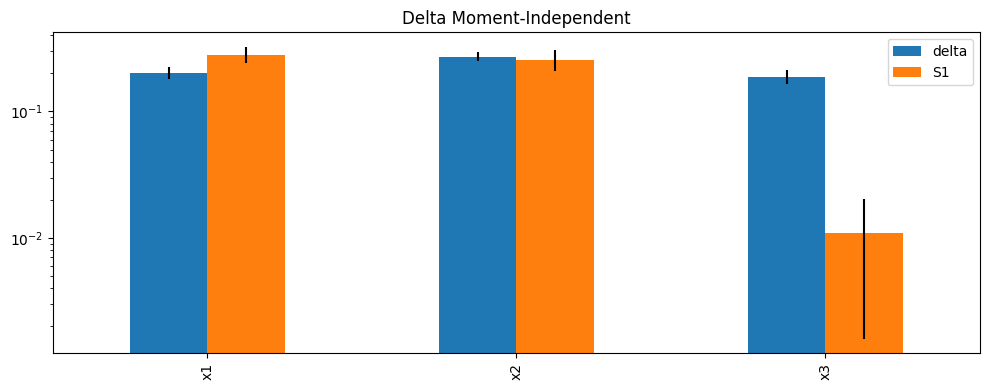

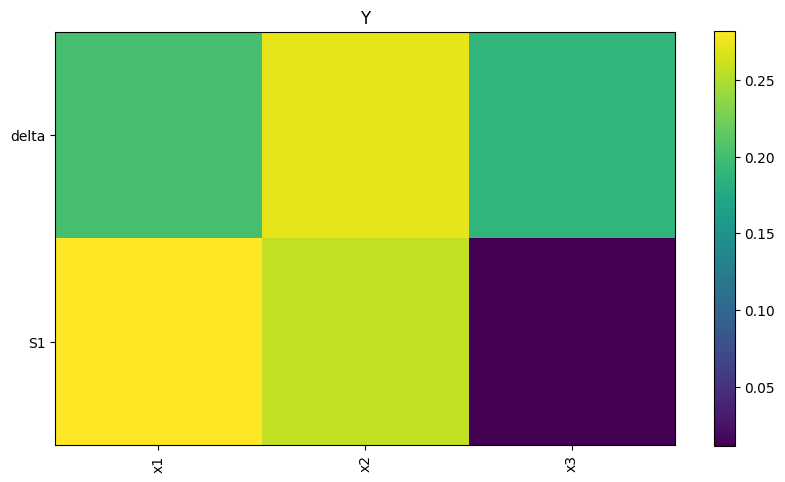

In [16]:
# ==== Delta Moment-Independent ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ?? any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_delta())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Delta Moment-Independent")
plt.tight_layout()

sp.heatmap()

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
           vi     vi_std      dgsm  dgsm_conf
x1   7.733127  16.435227  2.243290   1.032354
x2  24.375341  17.356755  7.071002   1.109163
x3  11.348873  24.401096  3.292176   1.444961



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

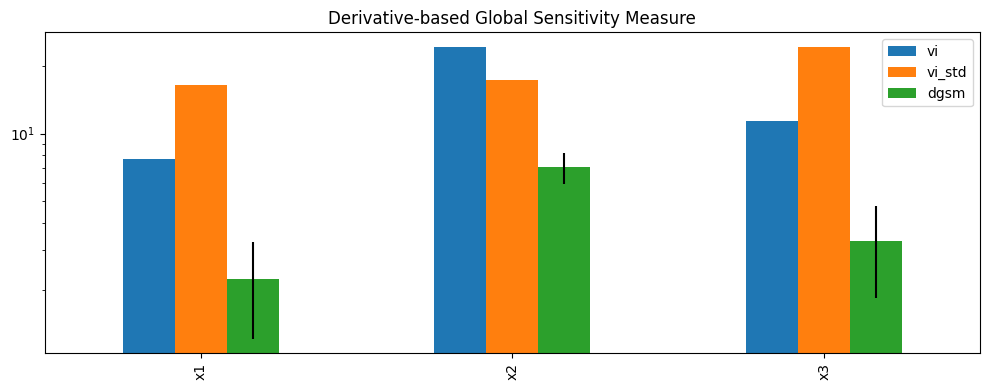

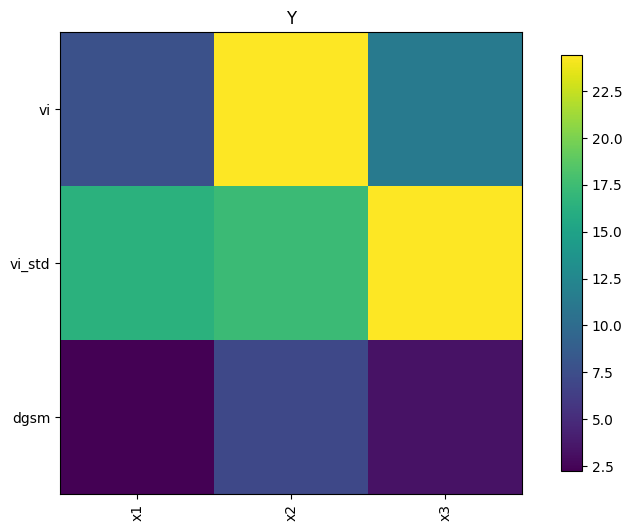

In [19]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_finite_diff(1000).evaluate(Ishigami.evaluate).analyze_dgsm())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Derivative-based Global Sensitivity Measure")
plt.tight_layout()

sp.heatmap()

Samples:
	4 parameters: ['x1', 'x2', 'x3', 'dummy_0']
	8 samples
Outputs:
	1 outputs: ['Y']
	8 evaluations
Analysis:
                   ME
x1      -2.221468e-12
x2       0.000000e+00
x3       0.000000e+00
dummy_0  0.000000e+00
                IE
(x1, x2)       0.0
(x1, x3)       0.0
(x2, x3)       0.0
(x1, dummy_0)  0.0
(x2, dummy_0)  0.0
(x3, dummy_0)  0.0



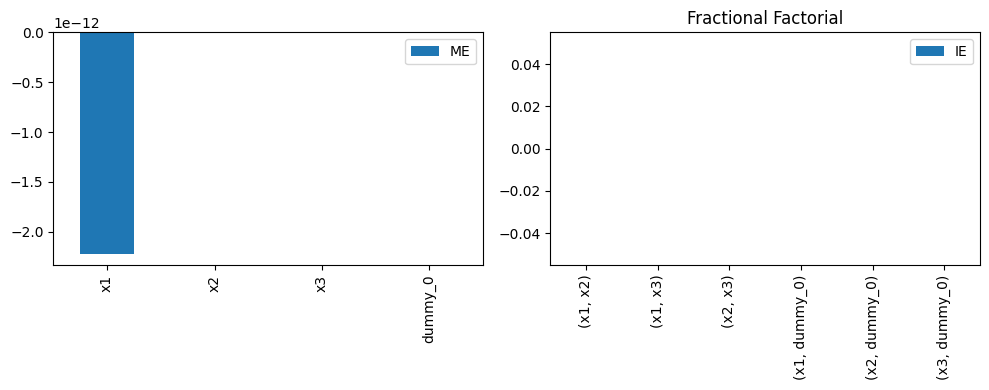

In [15]:
# ==== Fractional Factorial ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_ff(1000).evaluate(Ishigami.evaluate).analyze_ff(second_order=True))
print(sp)

df_ff = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Fractional Factorial")
plt.tight_layout()


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
    minimum      mean   median  maximum        CV
x1    0.163  0.241000  0.25800    0.347  0.243904
x2    0.210  0.365298  0.40849    0.494  0.293314
x3    0.078  0.119032  0.10400    0.227  0.348349



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Y'}>

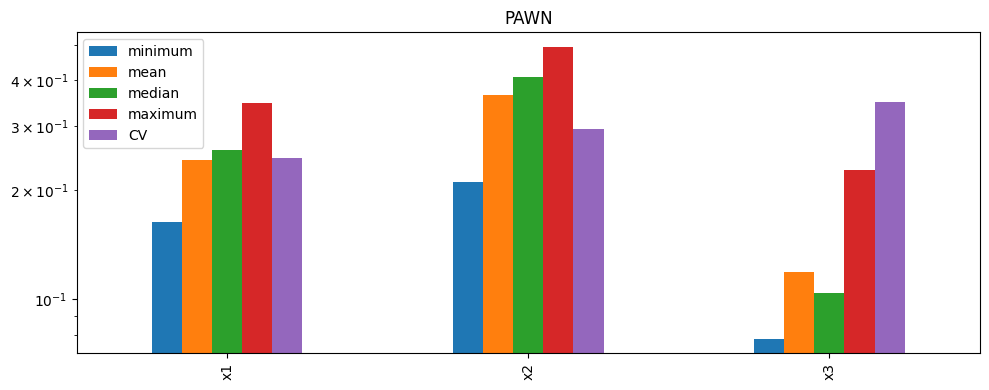

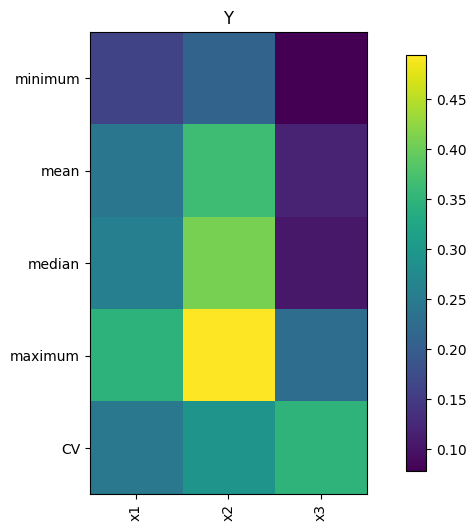

In [36]:
# ==== PAWN ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_pawn())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="PAWN")
plt.tight_layout()

sp.heatmap()

In [35]:
# ==== High-Dimensional ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359]]*3
})

# any sample
(sp.sample_saltelli(2048).evaluate(Ishigami.evaluate).analyze_hdmr())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
"""
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Derivative-based Global Sensitivity Measure")
plt.tight_layout()
"""
X = sp.samples
sp.emulate(X) # what should this do????

Samples:
	3 parameters: ['x1', 'x2', 'x3', 'x1/x2', 'x1/x3', 'x2/x3']
	16384 samples
Outputs:
	1 outputs: ['Y']
	16384 evaluations
Analysis:
             Sa   Sa_conf        Sb   Sb_conf         S    S_conf        ST  \
x1     0.311863  0.008530 -0.000416  0.005170  0.311175  0.008756  0.553290   
x2     0.349003  0.010390  0.000566  0.005984  0.348319  0.007629  0.349748   
x3     0.000168  0.000236  0.000049  0.000201  0.000217  0.000355  0.243071   
x1/x2  0.000297  0.000172  0.000217  0.000142  0.000345  0.000172       NaN   
x1/x3  0.240503  0.005917  0.002012  0.003314  0.241770  0.007260       NaN   
x2/x3  0.000767  0.000634  0.000953  0.000774  0.001084  0.000891       NaN   

        ST_conf  
x1     0.010012  
x2     0.007960  
x3     0.007256  
x1/x2       NaN  
x1/x3       NaN  
x2/x3       NaN  



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
            x1        x2        x3
0.00  5.138336  0.227218  3.155559
0.05  4.967001  0.418085  0.382395
0.10  4.770582  0.467546  0.679746
0.15  0.697532  0.702334  0.318252
0.20  0.329100  0.492658  0.884723
0.25  0.029321  0.228148  0.087092
0.30  0.508433  0.392108  0.133433
0.35  0.220275  0.094877  0.076841
0.40  0.163081  0.125639  0.098315
0.45  0.160308  0.118138  0.346205
0.50  0.115881  0.130915  0.335153
0.55  0.033944  0.190612  0.250047
0.60  0.064881  0.202999  0.051439
0.65  0.508506  0.244767  0.160092
0.70  0.267957  0.252774  0.285239
0.75  0.218344  0.254353  0.066978
0.80  2.556974  0.299435  0.406715
0.85  3.930062  0.502292  0.176401
0.90  5.216056  0.277782  0.829311
0.95  5.431153  0.330311  2.321856



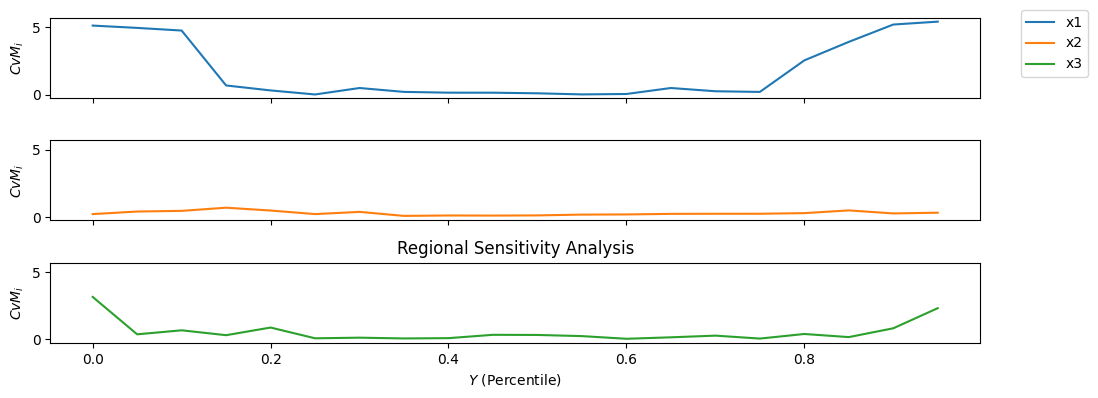

In [34]:
# ==== Regional Sensitivity Analysis ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ?? any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_rsa())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Regional Sensitivity Analysis")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
    s_discrepancy
x1       0.334432
x2       0.333050
x3       0.332518



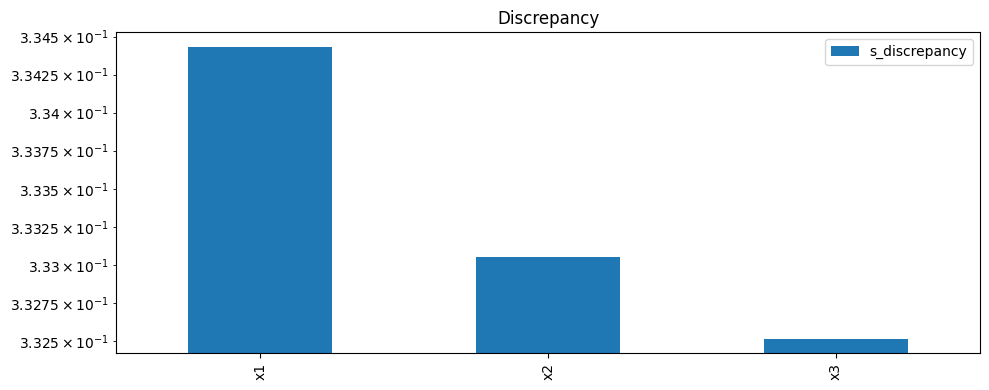

In [33]:
# ==== Discrepancy ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_discrepancy())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Discrepancy")
plt.tight_layout()